In [1]:
# Import important libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve 

In [2]:
# Read CSV data file
raw_data = pd.read_csv("data/vpn-non_vpn.csv")

# Confirm if data is correct
raw_data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,131.202.244.5-10.8.0.14-53-36455-17,10.8.0.14,36455.0,131.202.244.5,53.0,17.0,15/04/2015 02:23:50 AM,774.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,vpn
1,131.202.240.150-173.252.79.93-36512-3478-6,131.202.240.150,36512.0,173.252.79.93,3478.0,6.0,30/03/2015 06:12:03 PM,634204.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non_vpn
2,131.202.244.3-10.8.0.10-53-1588-17,10.8.0.10,1588.0,131.202.244.3,53.0,17.0,15/04/2015 01:18:04 AM,903.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,vpn
3,10.8.8.130-94.28.188.85-51413-6881-17,10.8.8.130,51413.0,94.28.188.85,6881.0,17.0,4/6/2015 18:05,207853.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,vpn
4,10.8.8.138-74.125.226.33-41347-443-6,10.8.8.138,41347.0,74.125.226.33,443.0,6.0,23/05/2015 01:19:08 AM,222081.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,vpn


## Data Analysis

In [3]:
# Checking the statistical summary of the numerical columns of the dataframe
raw_data.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,18086.000000,18086.000000,18086.000000,1.808600e+04,18086.000000,18086.000000,1.808600e+04,1.808600e+04,18086.000000,18086.000000,...,18086.000000,18086.0,1.808600e+04,1.808600e+04,1.808600e+04,1.808600e+04,1.808600e+04,1.808600e+04,1.808600e+04,1.808600e+04
mean,37737.942829,5439.077187,14.539865,9.436375e+06,47.048933,51.163110,1.735632e+04,3.644474e+04,68.627613,9.968982,...,33.653323,0.0,1.942805e+05,1.156850e+05,3.589577e+05,1.024922e+05,3.129935e+06,4.191802e+05,3.529052e+06,2.774783e+06
std,20451.855497,12566.876480,4.663002,2.830283e+07,651.744927,662.018457,6.032976e+05,6.507372e+05,234.233046,26.397082,...,628.538907,0.0,1.578639e+06,1.105401e+06,2.808593e+06,1.143389e+06,1.192584e+07,3.241278e+06,1.304238e+07,1.136392e+07
min,0.000000,0.000000,0.000000,1.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20046.000000,53.000000,17.000000,8.560000e+02,0.000000,1.000000,0.000000e+00,2.200000e+01,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,43093.000000,53.000000,17.000000,1.294150e+05,0.000000,2.000000,0.000000e+00,1.870000e+02,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,54962.750000,5355.000000,17.000000,4.150815e+05,1.000000,2.000000,2.200000e+01,2.620000e+02,22.000000,22.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65532.000000,65381.000000,17.000000,1.200000e+08,31666.000000,31412.000000,4.130000e+07,4.100000e+07,2676.000000,520.000000,...,31659.000000,0.0,6.330000e+07,4.030000e+07,6.530000e+07,6.330000e+07,1.200000e+08,7.640000e+07,1.200000e+08,1.200000e+08


In [4]:
# getting the information of all features in dataframe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow ID            18086 non-null  object 
 1   Src IP             18086 non-null  object 
 2   Src Port           18086 non-null  float64
 3   Dst IP             18086 non-null  object 
 4   Dst Port           18086 non-null  float64
 5   Protocol           18086 non-null  float64
 6   Timestamp          18086 non-null  object 
 7   Flow Duration      18086 non-null  float64
 8   Tot Fwd Pkts       18086 non-null  float64
 9   Tot Bwd Pkts       18086 non-null  float64
 10  TotLen Fwd Pkts    18086 non-null  float64
 11  TotLen Bwd Pkts    18086 non-null  float64
 12  Fwd Pkt Len Max    18086 non-null  float64
 13  Fwd Pkt Len Min    18086 non-null  float64
 14  Fwd Pkt Len Mean   18086 non-null  float64
 15  Fwd Pkt Len Std    18086 non-null  float64
 16  Bwd Pkt Len Max    180

In [5]:
# Check for Missing Values
print(raw_data.isnull().sum())

Flow ID      24
Src IP       24
Src Port     24
Dst IP       24
Dst Port     24
             ..
Idle Mean    24
Idle Std     24
Idle Max     24
Idle Min     24
Label         0
Length: 84, dtype: int64


All the features have 24 missing or null values.

In [6]:
# Check for Missing Values
null_values = raw_data.loc[raw_data.isnull().any(axis = 1)]
null_values

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vpn
625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vpn
1769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vpn
2274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vpn
2974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vpn
3659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vpn
6079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vpn
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vpn
6813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vpn
7184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vpn


These are all data points that contains missing values.

In [7]:
# check if data is imbalanced 
raw_data.Label.value_counts()

vpn        11149
non_vpn     6961
Name: Label, dtype: int64

we can see that the data is imbalanced

In [8]:
# calculate the fraction of the data corresponding to each class
vpn_frc = 11149/len(raw_data)
non_vpn_frc = 6961/len(raw_data)
print(vpn_frc, non_vpn_frc)

0.6156267255659856 0.38437327443401437


Text(0, 0.5, 'Frequency')

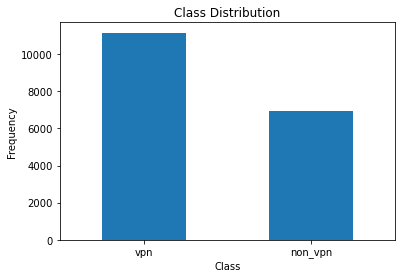

In [9]:
# Let's plot class against frequency
labels = ['vpn', 'non_vpn']
classes = raw_data.Label.value_counts()
classes.plot(kind = 'bar',rot = 0)
plt.title("Class Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [10]:
# Check duplicate values
raw_data.duplicated().sum()

23

## Data Cleaning

In [11]:
# Remove the rows with missing/NaN values
cleaned_data = raw_data.dropna(axis=0).copy()

In [12]:
cleaned_data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,131.202.244.5-10.8.0.14-53-36455-17,10.8.0.14,36455.0,131.202.244.5,53.0,17.0,15/04/2015 02:23:50 AM,774.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,vpn
1,131.202.240.150-173.252.79.93-36512-3478-6,131.202.240.150,36512.0,173.252.79.93,3478.0,6.0,30/03/2015 06:12:03 PM,634204.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non_vpn
2,131.202.244.3-10.8.0.10-53-1588-17,10.8.0.10,1588.0,131.202.244.3,53.0,17.0,15/04/2015 01:18:04 AM,903.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,vpn
3,10.8.8.130-94.28.188.85-51413-6881-17,10.8.8.130,51413.0,94.28.188.85,6881.0,17.0,4/6/2015 18:05,207853.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,vpn
4,10.8.8.138-74.125.226.33-41347-443-6,10.8.8.138,41347.0,74.125.226.33,443.0,6.0,23/05/2015 01:19:08 AM,222081.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,vpn


In [13]:
# neglect unuseful features (0-6 columns)
data_useful_feat = cleaned_data[cleaned_data.columns[7:]].copy()

In [14]:
label_encoder = LabelEncoder()
  
# Encode labels in column 'Label'.
data_useful_feat['Label']= label_encoder.fit_transform(data_useful_feat['Label'])
  
data_useful_feat['Label'].unique()

array([1, 0])

In [15]:
data_useful_feat.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,774.0,0.0,2.0,0.0,218.0,0.0,0.0,0.0,0.000000,185.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,634204.0,5.0,5.0,196.0,180.0,152.0,0.0,39.2,65.872604,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,903.0,0.0,2.0,0.0,175.0,0.0,0.0,0.0,0.000000,141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,207853.0,0.0,2.0,0.0,443.0,0.0,0.0,0.0,0.000000,346.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,222081.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
# apply min max normalization techniques
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

min_max_scaled = min_max_scaling(data_useful_feat)

In [17]:
# view normalized data
min_max_scaled.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000006,0.000000,0.000032,0.000000,0.000005,0.000000,0.0,0.000000,0.000000,0.008010,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.005285,0.000158,0.000127,0.000005,0.000004,0.056801,0.0,0.030047,0.065277,0.004503,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000008,0.000000,0.000032,0.000000,0.000004,0.000000,0.0,0.000000,0.000000,0.006105,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.001732,0.000000,0.000032,0.000000,0.000011,0.000000,0.0,0.000000,0.000000,0.014982,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.001851,0.000000,0.000032,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
min_max_scaled_cleaned = min_max_scaled.dropna(axis=1).copy()

In [19]:
min_max_scaled_cleaned.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000006,0.000000,0.000032,0.000000,0.000005,0.000000,0.0,0.000000,0.000000,0.008010,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.005285,0.000158,0.000127,0.000005,0.000004,0.056801,0.0,0.030047,0.065277,0.004503,...,0.000063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000008,0.000000,0.000032,0.000000,0.000004,0.000000,0.0,0.000000,0.000000,0.006105,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.001732,0.000000,0.000032,0.000000,0.000011,0.000000,0.0,0.000000,0.000000,0.014982,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.001851,0.000000,0.000032,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
corr_mat = min_max_scaled_cleaned.corr()
corr_mat.to_csv('corr_matrix.csv')

In [21]:
part_1 = min_max_scaled_cleaned[min_max_scaled_cleaned.columns[0:10]].copy()
part_1['Label']=min_max_scaled_cleaned['Label']

In [22]:
part_1.corr(method ='pearson')

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Label
Flow Duration,1.000000,0.189332,0.171586,0.078654,0.080882,0.410614,0.340254,0.334126,0.349383,0.152199,-0.138136
Tot Fwd Pkts,0.189332,1.000000,0.942545,0.846519,0.742731,0.153798,0.054293,0.296091,0.061822,0.104759,-0.002311
Tot Bwd Pkts,0.171586,0.942545,1.000000,0.728766,0.874372,0.141502,0.043140,0.240158,0.060104,0.132591,0.013717
TotLen Fwd Pkts,0.078654,0.846519,0.728766,1.000000,0.659786,0.129594,0.039162,0.329833,0.053574,0.066077,-0.013144
TotLen Bwd Pkts,0.080882,0.742731,0.874372,0.659786,1.000000,0.104600,0.023873,0.179505,0.039977,0.147715,0.011842
Fwd Pkt Len Max,0.410614,0.153798,0.141502,0.129594,0.104600,1.000000,0.038530,0.728376,0.947017,0.444788,-0.018738
Fwd Pkt Len Min,0.340254,0.054293,0.043140,0.039162,0.023873,0.038530,1.000000,0.276324,-0.074312,-0.113117,-0.409816
Fwd Pkt Len Mean,0.334126,0.296091,0.240158,0.329833,0.179505,0.728376,0.276324,1.000000,0.644974,0.282769,-0.095244
Fwd Pkt Len Std,0.349383,0.061822,0.060104,0.053574,0.039977,0.947017,-0.074312,0.644974,1.000000,0.410360,0.020080
Bwd Pkt Len Max,0.152199,0.104759,0.132591,0.066077,0.147715,0.444788,-0.113117,0.282769,0.410360,1.000000,0.209732


#### Here we can see that only correlated features with Label is Fwd Pkt len Min and Bwd Pkt Len Max

In [23]:
part_2 = min_max_scaled_cleaned[min_max_scaled_cleaned.columns[10:20]].copy()
part_2['label'] = min_max_scaled_cleaned['Label'].copy()

In [24]:
part_2.corr()

,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,label
Bwd Pkt Len Min,1.000000,0.074308,-0.009608,0.058705,-0.048147,0.223839,0.088606,0.105174,0.204127,0.035312,0.039960
Bwd Pkt Len Mean,0.074308,1.000000,0.565519,0.056734,-0.041011,-0.047714,-0.021075,0.004736,-0.032036,0.049071,0.282729
Bwd Pkt Len Std,-0.009608,0.565519,1.000000,0.078124,-0.047162,-0.129690,-0.032285,0.009677,-0.105025,0.045526,0.416421
Flow Byts/s,0.058705,0.056734,0.078124,1.000000,0.852020,-0.040089,-0.038798,-0.052903,-0.026936,-0.053292,0.083122
Flow Pkts/s,-0.048147,-0.041011,-0.047162,0.852020,1.000000,-0.022352,-0.021639,-0.029586,-0.015021,-0.031249,0.004315
Flow IAT Mean,0.223839,-0.047714,-0.129690,-0.040089,-0.022352,1.000000,0.417215,0.683606,0.893138,0.322075,-0.191740
Flow IAT Std,0.088606,-0.021075,-0.032285,-0.038798,-0.021639,0.417215,1.000000,0.823985,-0.014865,0.421358,-0.107437
Flow IAT Max,0.105174,0.004736,0.009677,-0.052903,-0.029586,0.683606,0.823985,1.000000,0.402175,0.595500,-0.148028
Flow IAT Min,0.204127,-0.032036,-0.105025,-0.026936,-0.015021,0.893138,-0.014865,0.402175,1.000000,0.169472,-0.158780
Fwd IAT Tot,0.035312,0.049071,0.045526,-0.053292,-0.031249,0.322075,0.421358,0.595500,0.169472,1.000000,-0.103794


#### Here we can see that correlated features with Label is Bwd Pkt Len Mean, Bwd Pkt Len std

In [25]:
part_3 = min_max_scaled_cleaned[min_max_scaled_cleaned.columns[20:30]].copy()
part_3['label'] = min_max_scaled_cleaned['Label'].copy()

In [26]:
part_3.corr()

,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,label
Fwd IAT Mean,1.000000,0.397897,0.709128,0.904608,0.314585,0.508141,0.402003,0.379632,0.192260,0.084390,-0.148154
Fwd IAT Std,0.397897,1.000000,0.789849,-0.006708,0.323750,0.270881,0.391252,0.480908,0.081021,0.140600,-0.080298
Fwd IAT Max,0.709128,0.789849,1.000000,0.470991,0.507076,0.413584,0.511694,0.661481,0.117786,0.178524,-0.114807
Fwd IAT Min,0.904608,-0.006708,0.470991,1.000000,0.226681,0.431554,0.292698,0.253862,0.168448,0.034262,-0.119096
Bwd IAT Tot,0.314585,0.323750,0.507076,0.226681,1.000000,0.551358,0.583403,0.716724,0.143638,0.355132,0.041783
Bwd IAT Mean,0.508141,0.270881,0.413584,0.431554,0.551358,1.000000,0.798514,0.735855,0.510261,0.185044,-0.007092
Bwd IAT Std,0.402003,0.391252,0.511694,0.292698,0.583403,0.798514,1.000000,0.889244,0.010354,0.232286,-0.003872
Bwd IAT Max,0.379632,0.480908,0.661481,0.253862,0.716724,0.735855,0.889244,1.000000,0.193567,0.276695,0.017912
Bwd IAT Min,0.192260,0.081021,0.117786,0.168448,0.143638,0.510261,0.010354,0.193567,1.000000,0.023695,0.008110
Bwd PSH Flags,0.084390,0.140600,0.178524,0.034262,0.355132,0.185044,0.232286,0.276695,0.023695,1.000000,0.011182


#### Here we can see that correlated feature with Label is

In [27]:
part_4 = min_max_scaled_cleaned[min_max_scaled_cleaned.columns[30:40]].copy()
part_4['Label'] = min_max_scaled_cleaned['Label'].copy()

In [28]:
part_4.corr()

,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,Label
Fwd Header Len,1.000000,0.860953,-0.005696,-0.006533,-0.050021,0.162450,0.359839,0.212257,0.162150,-0.010902,0.031572
Bwd Header Len,0.860953,1.000000,-0.006629,-0.007099,-0.065285,0.188436,0.420097,0.258826,0.198027,-0.011354,0.043078
Fwd Pkts/s,-0.005696,-0.006629,1.000000,0.617419,-0.099672,-0.045025,-0.057620,-0.056348,-0.018745,-0.012699,-0.002676
Bwd Pkts/s,-0.006533,-0.007099,0.617419,1.000000,-0.064636,-0.030576,-0.036864,-0.031752,-0.014675,0.058468,0.007438
Pkt Len Min,-0.050021,-0.065285,-0.099672,-0.064636,1.000000,-0.116001,0.071032,-0.114170,-0.134646,-0.164124,0.040205
Pkt Len Max,0.162450,0.188436,-0.045025,-0.030576,-0.116001,1.000000,0.657500,0.857797,0.862947,-0.079124,0.194943
Pkt Len Mean,0.359839,0.420097,-0.057620,-0.036864,0.071032,0.657500,1.000000,0.872624,0.647544,-0.108595,0.284108
Pkt Len Std,0.212257,0.258826,-0.056348,-0.031752,-0.114170,0.857797,0.872624,1.000000,0.763605,-0.102167,0.377279
Pkt Len Var,0.162150,0.198027,-0.018745,-0.014675,-0.134646,0.862947,0.647544,0.763605,1.000000,-0.030899,0.082211
FIN Flag Cnt,-0.010902,-0.011354,-0.012699,0.058468,-0.164124,-0.079124,-0.108595,-0.102167,-0.030899,1.000000,-0.005267


#### Here we can see that correlated feature with Label is Pkt Len Mean, Pkt Len Std

In [29]:
part_5 = min_max_scaled_cleaned[min_max_scaled_cleaned.columns[40:50]].copy()
part_5['Label'] = min_max_scaled_cleaned['Label'].copy()

In [30]:
part_5.corr()

,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Label
SYN Flag Cnt,1.000000,-0.041364,-0.066040,-0.100162,0.224401,0.362223,0.322607,0.409585,0.070860,0.024937,0.039192
RST Flag Cnt,-0.041364,1.000000,-0.037864,-0.057428,0.039562,-0.146833,-0.044701,-0.100090,-0.010809,-0.004431,0.067430
PSH Flag Cnt,-0.066040,-0.037864,1.000000,0.659328,0.226800,-0.035932,0.148368,-0.035104,-0.001272,-0.002304,0.011182
ACK Flag Cnt,-0.100162,-0.057428,0.659328,1.000000,0.214768,-0.174309,0.074787,-0.109846,-0.012961,-0.006791,-0.008045
Down/Up Ratio,0.224401,0.039562,0.226800,0.214768,1.000000,-0.160703,0.134320,-0.035314,0.037123,-0.003659,-0.457656
Pkt Size Avg,0.362223,-0.146833,-0.035932,-0.174309,-0.160703,1.000000,0.340197,0.895671,0.229809,0.172183,0.368483
Fwd Seg Size Avg,0.322607,-0.044701,0.148368,0.074787,0.134320,0.340197,1.000000,0.042888,0.296091,0.329854,-0.095244
Bwd Seg Size Avg,0.409585,-0.100090,-0.035104,-0.109846,-0.035314,0.895671,0.042888,1.000000,0.180789,0.084012,0.282729
Subflow Fwd Pkts,0.070860,-0.010809,-0.001272,-0.012961,0.037123,0.229809,0.296091,0.180789,1.000000,0.846500,-0.002311
Subflow Fwd Byts,0.024937,-0.004431,-0.002304,-0.006791,-0.003659,0.172183,0.329854,0.084012,0.846500,1.000000,-0.013135


#### Here we can see that correlated features with Label is Down/Up Ratio ,Pkt size avg , and Bwd Seg Size Avg

In [31]:
part_6 = min_max_scaled_cleaned[min_max_scaled_cleaned.columns[50:63]].copy()
part_6['Label'] = min_max_scaled_cleaned['Label'].copy()

In [32]:
part_6.corr()

,Subflow Bwd Pkts,Subflow Bwd Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Subflow Bwd Pkts,1.000000,0.874379,-0.010251,0.859679,0.021826,0.018897,0.020883,0.014594,-0.012388,-0.002169,-0.011350,-0.012632,0.013717
Subflow Bwd Byts,0.874379,1.000000,-0.010339,0.614413,0.003226,0.002721,0.002021,0.002497,-0.011884,-0.004221,-0.011798,-0.011407,0.011836
Init Bwd Win Byts,-0.010251,-0.010339,1.000000,-0.006687,0.016058,0.019158,0.019629,0.004300,0.086722,0.112726,0.105904,0.067513,-0.209813
Fwd Act Data Pkts,0.859679,0.614413,-0.006687,1.000000,0.013908,0.012047,0.014075,0.009395,-0.008823,-0.001938,-0.008136,-0.008910,-0.012920
Active Mean,0.021826,0.003226,0.016058,0.013908,1.000000,0.701137,0.911828,0.850159,0.118799,0.126594,0.147666,0.093167,-0.032698
Active Std,0.018897,0.002721,0.019158,0.012047,0.701137,1.000000,0.902670,0.244927,0.075392,0.146629,0.115241,0.042129,-0.021076
Active Max,0.020883,0.002021,0.019629,0.014075,0.911828,0.902670,1.000000,0.597745,0.105533,0.145541,0.144435,0.073483,-0.033516
Active Min,0.014594,0.002497,0.004300,0.009395,0.850159,0.244927,0.597745,1.000000,0.108565,0.067155,0.118419,0.097781,-0.032421
Idle Mean,-0.012388,-0.011884,0.086722,-0.008823,0.118799,0.075392,0.105533,0.108565,1.000000,0.316211,0.979301,0.977694,-0.139851
Idle Std,-0.002169,-0.004221,0.112726,-0.001938,0.126594,0.146629,0.145541,0.067155,0.316211,1.000000,0.490818,0.115010,-0.048369


#### Here we can see that correlated feature with Label is Init Bwd Win Byts

## Selecting features having absolute correlation values above 0.2 beacuse max correlation value is around 0.4 only.

In [33]:
# features with absolute correlation values greater than 0.2 
corr_features = ['Fwd Pkt Len Min', 'Bwd Pkt Len Max',  'Bwd Pkt Len Mean', 
                  'Bwd Pkt Len Std', 'Pkt Len Mean', 'Pkt Len Std', 'Down/Up Ratio', 
                  'Pkt Size Avg', 'Bwd Seg Size Avg', 'Init Bwd Win Byts','Label']
Final_dataframe = min_max_scaled_cleaned[corr_features].copy()

In [34]:
Final_dataframe.head()

,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Pkt Len Mean,Pkt Len Std,Down/Up Ratio,Pkt Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,Label
0,0.0,0.008010,0.038076,0.033726,0.056290,0.035547,0.0,0.083497,0.038076,0.000000,1.0
1,0.0,0.004503,0.012576,0.015777,0.022997,0.021730,0.2,0.025016,0.012576,0.000458,0.0
2,0.0,0.006105,0.030566,0.023741,0.046871,0.025023,0.0,0.069525,0.030566,0.000000,1.0
3,0.0,0.014982,0.077375,0.055249,0.121102,0.058231,0.0,0.179634,0.077375,0.000000,1.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.005356,1.0


<AxesSubplot:>

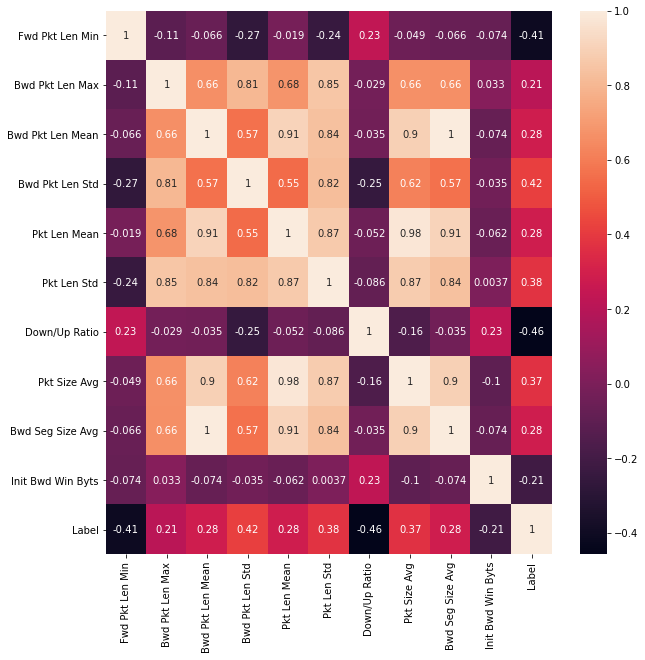

In [35]:
f, ax =  plt.subplots(figsize=(10, 10))
sns.heatmap(Final_dataframe.corr(), annot=True)

## Train and Test sets

In [36]:
X = Final_dataframe.iloc[:, :-1].copy()
X.head()

,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Pkt Len Mean,Pkt Len Std,Down/Up Ratio,Pkt Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts
0,0.0,0.008010,0.038076,0.033726,0.056290,0.035547,0.0,0.083497,0.038076,0.000000
1,0.0,0.004503,0.012576,0.015777,0.022997,0.021730,0.2,0.025016,0.012576,0.000458
2,0.0,0.006105,0.030566,0.023741,0.046871,0.025023,0.0,0.069525,0.030566,0.000000
3,0.0,0.014982,0.077375,0.055249,0.121102,0.058231,0.0,0.179634,0.077375,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.005356


In [37]:
y = Final_dataframe['Label'].copy()
y

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
18105    1.0
18106    1.0
18107    1.0
18108    0.0
18109    1.0
Name: Label, Length: 18086, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the data - 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 0)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (12660, 10)
Testing split input-  (5426, 10)


### Building a tree

In [39]:
# Defining the decision tree algorithm

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Testing

In [40]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      2124
         1.0       0.94      0.97      0.95      3302

    accuracy                           0.94      5426
   macro avg       0.94      0.93      0.94      5426
weighted avg       0.94      0.94      0.94      5426



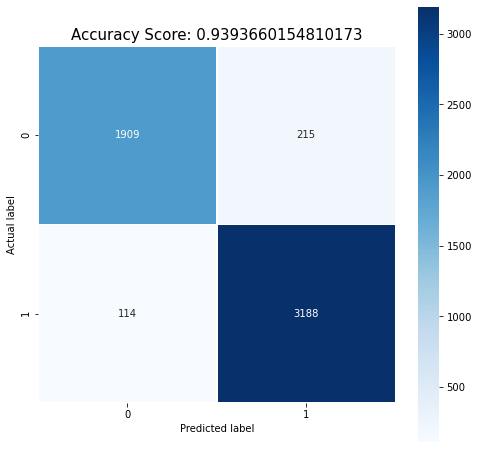

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

In [42]:
# Predict on both the training and test data
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

# Calculate accuracy for both training and test predictions
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9541864139020537
Test Accuracy: 0.9393660154810173


### Naive Bayes Classifier

In [43]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)


GaussianNB()

In [44]:
# Predicting the values of test data
y_pred = gnb.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.80      0.85      0.83      2124
         1.0       0.90      0.86      0.88      3302

    accuracy                           0.86      5426
   macro avg       0.85      0.86      0.85      5426
weighted avg       0.86      0.86      0.86      5426



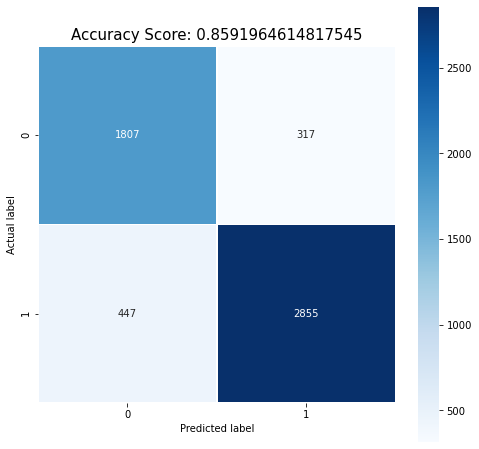

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(gnb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

In [46]:
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Calculate accuracy for both training and test predictions
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8560031595576619
Test Accuracy: 0.8591964614817545


### Random Forest Classifier

In [47]:
#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
# Predicting the values of test data
y_pred = clf.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      2124
         1.0       0.93      0.97      0.95      3302

    accuracy                           0.94      5426
   macro avg       0.94      0.93      0.94      5426
weighted avg       0.94      0.94      0.94      5426



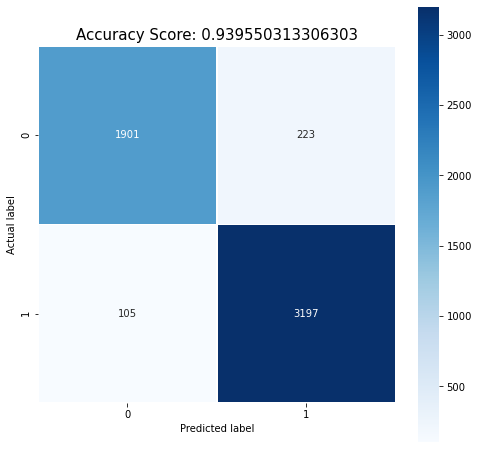

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

In [50]:
# Predict on both the training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy for both training and test predictions
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9541864139020537
Test Accuracy: 0.939550313306303


### Adaboost classifier

In [51]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)



In [52]:
# Predicting the values of test data
y_pred = abc.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.97      0.78      0.87      2124
         1.0       0.88      0.99      0.93      3302

    accuracy                           0.91      5426
   macro avg       0.92      0.88      0.90      5426
weighted avg       0.91      0.91      0.90      5426



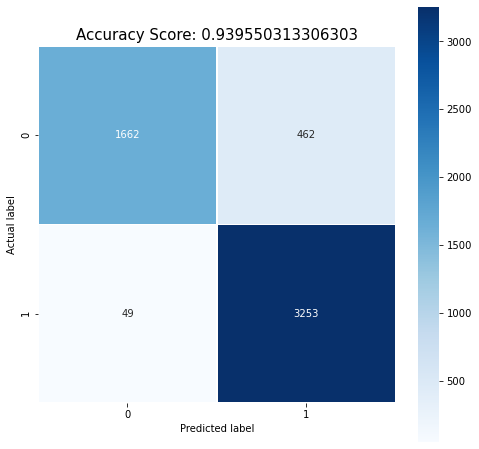

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")


In [54]:
# Predict on both the training and test data
y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)

# Calculate accuracy for both training and test predictions
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9119273301737757
Test Accuracy: 0.9058238112790269


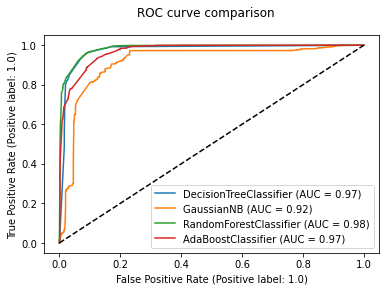

<Figure size 1440x720 with 0 Axes>

In [55]:
dtree_disp = plot_roc_curve(dtree, X_test, y_test) 
gnb_disp = plot_roc_curve(gnb, X_test, y_test, ax=dtree_disp.ax_)
clf_disp = plot_roc_curve(clf, X_test, y_test, ax=dtree_disp.ax_)
abc_disp = plot_roc_curve(abc, X_test, y_test, ax=dtree_disp.ax_)
plt.plot([0,1], [0,1], color='black', linestyle='--')
abc_disp.figure_.suptitle("ROC curve comparison")

plt.savefig("ROC_curve_comparison_corr_20.png")
plt.figure(figsize = (20, 10))
plt.show()

# Selecting features having absolute value of correlation >= 0.1

In [56]:
# features with absolute correlation values greater than 0.2 
corr_features1 = ['Fwd Pkt Len Min', 'Bwd Pkt Len Max',  'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Pkt Len Mean',
                  'Pkt Len Std', 'Down/Up Ratio', 'Pkt Size Avg', 'Bwd Seg Size Avg', 'Init Bwd Win Byts',
                  'Flow Duration','Flow IAT Mean','Flow IAT Std', 'Flow IAT Max','Flow IAT Min','Fwd IAT Tot',
                  'Fwd IAT Mean','Fwd IAT Max','Fwd IAT Min','Pkt Len Max','Idle Mean', 'Idle Max','Idle Min','Label']

Final_dataframe1 = min_max_scaled_cleaned[corr_features1].copy()

In [57]:
Final_dataframe1.head()

,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Pkt Len Mean,Pkt Len Std,Down/Up Ratio,Pkt Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,...,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Max,Fwd IAT Min,Pkt Len Max,Idle Mean,Idle Max,Idle Min,Label
0,0.0,0.008010,0.038076,0.033726,0.056290,0.035547,0.0,0.083497,0.038076,0.000000,...,0.000008,0.000000,0.000000,0.000000,0.000000,0.008010,0.0,0.0,0.0,1.0
1,0.0,0.004503,0.012576,0.015777,0.022997,0.021730,0.2,0.025016,0.012576,0.000458,...,0.000002,0.004611,0.001269,0.002993,0.000001,0.006582,0.0,0.0,0.0,0.0
2,0.0,0.006105,0.030566,0.023741,0.046871,0.025023,0.0,0.069525,0.030566,0.000000,...,0.000009,0.000000,0.000000,0.000000,0.000000,0.006105,0.0,0.0,0.0,1.0
3,0.0,0.014982,0.077375,0.055249,0.121102,0.058231,0.0,0.179634,0.077375,0.000000,...,0.001734,0.000000,0.000000,0.000000,0.000000,0.014982,0.0,0.0,0.0,1.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.005356,...,0.001852,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0


In [58]:
X1 = Final_dataframe1.iloc[:, :-1].copy()
X1.head()

,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Pkt Len Mean,Pkt Len Std,Down/Up Ratio,Pkt Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,...,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Max,Fwd IAT Min,Pkt Len Max,Idle Mean,Idle Max,Idle Min
0,0.0,0.008010,0.038076,0.033726,0.056290,0.035547,0.0,0.083497,0.038076,0.000000,...,0.000006,0.000008,0.000000,0.000000,0.000000,0.000000,0.008010,0.0,0.0,0.0
1,0.0,0.004503,0.012576,0.015777,0.022997,0.021730,0.2,0.025016,0.012576,0.000458,...,0.002993,0.000002,0.004611,0.001269,0.002993,0.000001,0.006582,0.0,0.0,0.0
2,0.0,0.006105,0.030566,0.023741,0.046871,0.025023,0.0,0.069525,0.030566,0.000000,...,0.000008,0.000009,0.000000,0.000000,0.000000,0.000000,0.006105,0.0,0.0,0.0
3,0.0,0.014982,0.077375,0.055249,0.121102,0.058231,0.0,0.179634,0.077375,0.000000,...,0.001732,0.001734,0.000000,0.000000,0.000000,0.000000,0.014982,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.005356,...,0.001851,0.001852,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [59]:
y1 = Final_dataframe1['Label'].copy()
y1

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
18105    1.0
18106    1.0
18107    1.0
18108    0.0
18109    1.0
Name: Label, Length: 18086, dtype: float64

In [60]:
# Splitting the data - 70:30 ratio
X1_train, X1_test, y1_train, y1_test = train_test_split(X1 , y1, test_size = 0.3, random_state = 0)
print("Training split input- ", X1_train.shape)
print("Testing split input- ", X1_test.shape)

Training split input-  (12660, 23)
Testing split input-  (5426, 23)


In [61]:
#for encoding
le = LabelEncoder()
le.fit(y1_train)


LabelEncoder()

In [62]:
le.classes_

array([0., 1.])

In [63]:
y1_train

14766    0.0
8892     1.0
12997    0.0
3004     0.0
9307     0.0
        ... 
9237     0.0
13137    1.0
9858     1.0
10812    0.0
2736     1.0
Name: Label, Length: 12660, dtype: float64

In [64]:
y1_test

2428     1.0
9194     1.0
3258     1.0
5084     0.0
2034     1.0
        ... 
8167     1.0
11674    1.0
14349    1.0
10891    0.0
6163     1.0
Name: Label, Length: 5426, dtype: float64

In [65]:
le.transform(y_train)

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [66]:
le.transform(y_test)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

### Decision tree classifier

In [67]:
# Defining the decision tree algorithm

dt = DecisionTreeClassifier()
dt.fit(X1_train,y1_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Testing

In [68]:
# Predicting the values of test data
y1_pred = dt.predict(X1_test)
print("Classification report - \n", classification_report(y1_test,y1_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2124
         1.0       0.97      0.98      0.97      3302

    accuracy                           0.97      5426
   macro avg       0.97      0.97      0.97      5426
weighted avg       0.97      0.97      0.97      5426



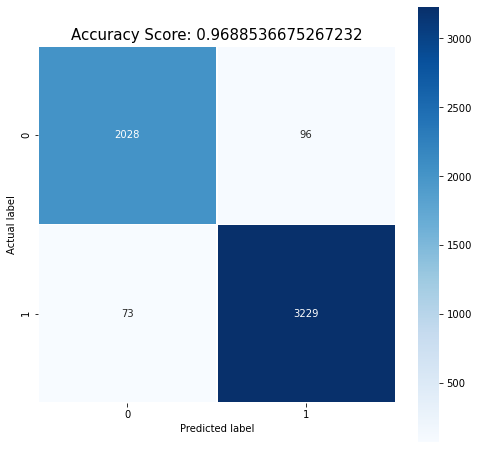

In [69]:
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(dt.score(X1_test, y1_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

### Naive Bayes Classifier

In [70]:
#Create a Gaussian Classifier
NB = GaussianNB()

#Train the model using the training sets
NB.fit(X1_train, y1_train)


GaussianNB()

In [71]:
# Predicting the values of test data
y1_pred = NB.predict(X1_test)
print("Classification report - \n", classification_report(y1_test,y1_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.70      0.23      0.35      2124
         1.0       0.66      0.94      0.77      3302

    accuracy                           0.66      5426
   macro avg       0.68      0.58      0.56      5426
weighted avg       0.67      0.66      0.61      5426



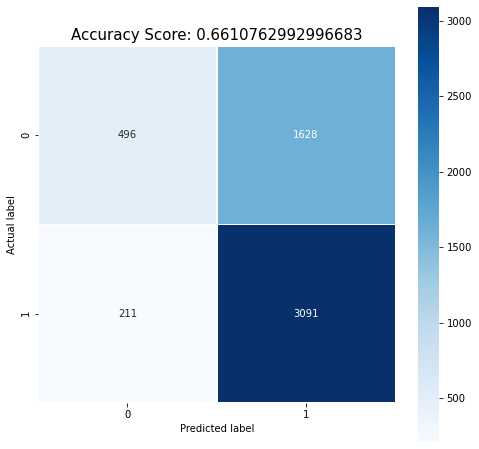

In [72]:
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(NB.score(X1_test, y1_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

### Random Forest Classifier

In [73]:
#Create a Gaussian Classifier
RF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X1_train,y1_train)

RandomForestClassifier()

In [74]:
# Predicting the values of test data
y1_pred = RF.predict(X1_test)
print("Classification report - \n", classification_report(y1_test,y1_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2124
         1.0       0.97      0.99      0.98      3302

    accuracy                           0.98      5426
   macro avg       0.98      0.97      0.97      5426
weighted avg       0.98      0.98      0.98      5426



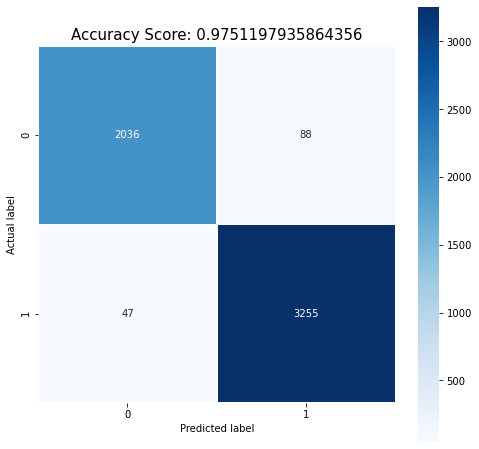

In [75]:
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(RF.score(X1_test, y1_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

### Adaboost Classifier

In [76]:
# Create adaboost classifer object
AB = AdaBoostClassifier(n_estimators=50,
                       learning_rate=1)
# Train Adaboost Classifer
model = AB.fit(X1_train, y1_train)



In [77]:
# Predicting the values of test data
y1_pred = AB.predict(X1_test)
print("Classification report - \n", classification_report(y1_test,y1_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      2124
         1.0       0.92      0.97      0.95      3302

    accuracy                           0.93      5426
   macro avg       0.94      0.92      0.93      5426
weighted avg       0.93      0.93      0.93      5426



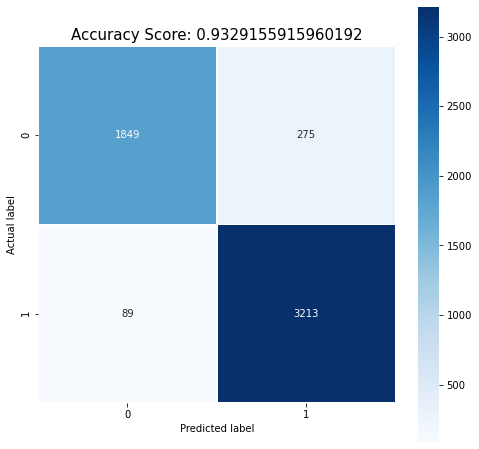

In [78]:
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(AB.score(X1_test, y1_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

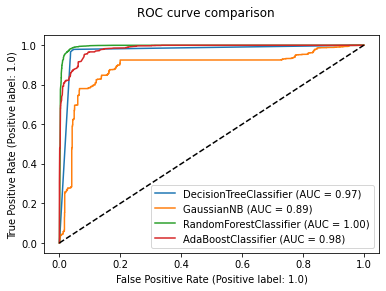

In [79]:
dt_disp = plot_roc_curve(dt, X1_test, y1_test) 
NB_disp = plot_roc_curve(NB, X1_test, y1_test, ax=dt_disp.ax_)
RF_disp = plot_roc_curve(RF, X1_test, y1_test, ax=dt_disp.ax_)
AB_disp = plot_roc_curve(AB, X1_test, y1_test, ax=dt_disp.ax_)
plt.plot([0,1], [0,1], color='black', linestyle='--')
AB_disp.figure_.suptitle("ROC curve comparison")


plt.savefig("ROC_curve_comparison_corr_10.png")
plt.show()